In [2]:
# Import libraries
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image
import numpy as np

2.2.0


In [3]:
# Specify path to training, validation, and testing data
train_path = 'Train_80_10_10/train'
val_path = 'Train_80_10_10/val'
test_path = 'Train_80_10_10/test'

In [4]:
# Normalize images (you can also augment training dataset if needed here)
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
Image_width = 180
Image_height = 180
Image_channels = 3
target_size = (Image_width,Image_height)

# Prepare batches of data for training
train_data_gen = train_datagen.flow_from_directory(train_path,
                                               target_size=target_size,
                                               batch_size=64,
                                               class_mode='categorical',
                                               shuffle=True)

# Prepare batches of data for validation
val_data_gen = val_datagen.flow_from_directory(val_path,
                                               target_size=target_size,
                                               batch_size=16,
                                               class_mode='categorical',
                                               shuffle=True)

# Prepare batches of data for testing on unknown samples (not used for training/validation)
test_data_gen = test_datagen.flow_from_directory(test_path,
                                               target_size=target_size,
                                               batch_size=16,
                                               class_mode='categorical',
                                               shuffle=True)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Train_80_10_10/train'

In [6]:
# The next function returns a batch from the training dataset. We use image data and discard the labels.
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 4 rows and 4 columns 
def plotImages(images_arr):
    fig, axes = plt.subplots(4, 4, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot 16 random images from training data    
plotImages(sample_training_images[:16])

NameError: name 'train_data_gen' is not defined

In [7]:
model = Sequential()
model.add(Conv2D(input_shape=(Image_width, Image_height, Image_channels),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 128)       7

# Build your CNN model

model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape=(Image_width, Image_height, Image_channels), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))
    
model.summary()

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("CatDogClassifier.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit_generator(steps_per_epoch=128,generator=train_data_gen, validation_data= val_data_gen, validation_steps=50,epochs=50,callbacks=[checkpoint,early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
128/128 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4996
Epoch 00001: val_accuracy improved from -inf to 0.51375, saving model to CatDogClassifier.h5
128/128 [==============================] - 50s 391ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6930 - val_accuracy: 0.5138
Epoch 2/50
128/128 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5511
Epoch 00002: val_accuracy improved from 0.51375 to 0.64500, saving model to CatDogClassifier.h5
128/128 [==============================] - 49s 380ms/step - loss: 0.6855 - accuracy: 0.5511 - val_loss: 0.6304 - val_accuracy: 0.6450
Epoch 3/50
128/128 [==============================] - ETA: 0s - loss: 0.6443 - accuracy: 0.6245
Epoch 00003: val_accuracy improved from 0.64500 to 0.67125, saving model to CatDogClassifier.h5
128/128 [==============================] - 49s 380ms/step - loss: 0.6443 - accuracy

Epoch 27/50
128/128 [==============================] - ETA: 0s - loss: 0.1640 - accuracy: 0.9310
Epoch 00027: val_accuracy did not improve from 0.92625
128/128 [==============================] - 83s 646ms/step - loss: 0.1640 - accuracy: 0.9310 - val_loss: 0.1811 - val_accuracy: 0.9200
Epoch 28/50
128/128 [==============================] - ETA: 0s - loss: 0.1630 - accuracy: 0.9324
Epoch 00028: val_accuracy did not improve from 0.92625
128/128 [==============================] - 82s 638ms/step - loss: 0.1630 - accuracy: 0.9324 - val_loss: 0.1804 - val_accuracy: 0.9150
Epoch 29/50
128/128 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9371
Epoch 00029: val_accuracy did not improve from 0.92625
128/128 [==============================] - 82s 638ms/step - loss: 0.1528 - accuracy: 0.9371 - val_loss: 0.2007 - val_accuracy: 0.9112
Epoch 30/50
128/128 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9376
Epoch 00030: val_accuracy did not improve fro

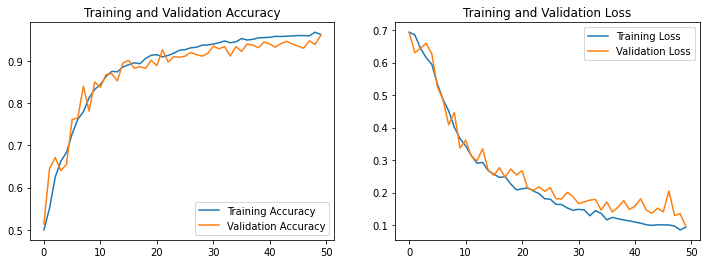

In [9]:
# Plot model accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
from tensorflow.keras.models import load_model
saved_model = load_model("CatDogClassifier.h5")
test_acc = saved_model.evaluate(test_data_gen, steps=50)

50/50 [==============================] - 5s 95ms/step - loss: 0.1983 - accuracy: 0.9287


In [38]:
target_names = []
for key in train_data_gen.class_indices:
    target_names.append(key)
print(target_names)

['Cat', 'Dog']


Dog


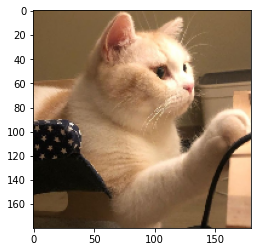

In [51]:

img = image.load_img("cat_1.jpg",target_size=(180,180))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = saved_model.predict(img)
if output[0][0] >= output[0][1]:
    print("Cat")
else:
    print('Dog')